In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

In [15]:
X.shape

(10000, 11)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder() 
X[:, 1] = labelencoder_x_1.fit_transform(X[:, 1])
labelencoder_x_2 = LabelEncoder()
X[:, 2] = labelencoder_x_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\pitam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pitam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
X.shape

(10000, 11)

In [16]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [17]:
X[0,1]

0.0

In [18]:
X[0,2]

619.0

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
standardscalar_x = StandardScaler()
X_train = standardscalar_x.fit_transform(X_train)
X_test = standardscalar_x.transform(X_test)

In [24]:
X_train

array([[-0.56953701, -0.57436296, -1.78451879, ..., -1.56299709,
        -1.03339307,  1.0890591 ],
       [-0.56953701, -0.57436296,  1.47401668, ...,  0.63979645,
         0.967686  , -0.4551902 ],
       [-0.56953701, -0.57436296, -0.82854466, ..., -1.56299709,
         0.967686  , -0.65446947],
       ...,
       [-0.56953701, -0.57436296,  0.89837634, ...,  0.63979645,
        -1.03339307,  1.40745917],
       [-0.56953701,  1.74105933, -0.62295883, ...,  0.63979645,
         0.967686  ,  0.83939459],
       [ 1.75581215, -0.57436296, -0.2837422 , ...,  0.63979645,
        -1.03339307,  0.31973777]])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [60]:
model.add(Dense(6, input_dim = 11, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

In [61]:
model.compile('sgd', 'mse', metrics = ['accuracy', 'mae'])

In [62]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
6700/6700 [==============================] - 1s 174us/sample - loss: 0.2008 - acc: 0.7979 - mean_absolute_error: 0.4361
Epoch 2/100
6700/6700 [==============================] - 1s 159us/sample - loss: 0.1690 - acc: 0.7979 - mean_absolute_error: 0.3695
Epoch 3/100
6700/6700 [==============================] - 1s 165us/sample - loss: 0.1640 - acc: 0.7979 - mean_absolute_error: 0.3444
Epoch 4/100
6700/6700 [==============================] - 1s 158us/sample - loss: 0.1628 - acc: 0.7979 - mean_absolute_error: 0.3347
Epoch 5/100
6700/6700 [==============================] - 1s 158us/sample - loss: 0.1623 - acc: 0.7979 - mean_absolute_error: 0.3295
Epoch 6/100
6700/6700 [==============================] - 1s 149us/sample - loss: 0.1621 - acc: 0.7979 - mean_absolute_error: 0.3260
Epoch 7/100
6700/6700 [==============================] - 1s 150us/sample - loss: 0.1619 - acc: 0.7979 - mean_absolute_error: 0.3255
Epoch 8/100
6700/6700 [==============================] - 1s 151us/sample - l

6700/6700 [==============================] - 1s 148us/sample - loss: 0.1043 - acc: 0.8675 - mean_absolute_error: 0.2178
Epoch 63/100
6700/6700 [==============================] - 1s 149us/sample - loss: 0.1042 - acc: 0.8678 - mean_absolute_error: 0.2186
Epoch 64/100
6700/6700 [==============================] - 1s 149us/sample - loss: 0.1040 - acc: 0.8678 - mean_absolute_error: 0.2175
Epoch 65/100
6700/6700 [==============================] - 1s 148us/sample - loss: 0.1038 - acc: 0.8681 - mean_absolute_error: 0.2185
Epoch 66/100
6700/6700 [==============================] - 1s 149us/sample - loss: 0.1038 - acc: 0.8673 - mean_absolute_error: 0.2164
Epoch 67/100
6700/6700 [==============================] - 1s 149us/sample - loss: 0.1036 - acc: 0.8678 - mean_absolute_error: 0.2151
Epoch 68/100
6700/6700 [==============================] - 1s 150us/sample - loss: 0.1036 - acc: 0.8696 - mean_absolute_error: 0.2164
Epoch 69/100
6700/6700 [==============================] - 1s 149us/sample - loss: 

In [63]:
history.history.keys()

dict_keys(['loss', 'acc', 'mean_absolute_error'])

In [64]:
y_pred = model.predict(X_test)

In [72]:
model.evaluate(X_test, y_test)

3300/3300 [==============================] - 0s 37us/sample - loss: 0.1061 - acc: 0.8576 - mean_absolute_error: 0.2154


[0.10611402608680003, 0.8575758, 0.21541867]

In [65]:
ypred = y_pred>0.5

In [66]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, ypred))
print(accuracy_score(y_test, ypred)*100,'%')

[[2477  140]
 [ 330  353]]
85.75757575757575 %


In [68]:
y_test

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

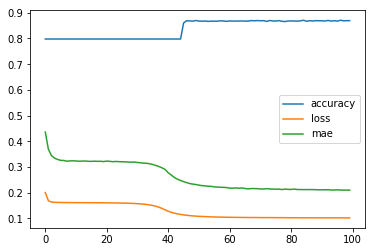

In [69]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['accuracy', 'loss', 'mae'])
plt.show()

# Model Saving


In [76]:
model_json = model.to_json()
with open('clients.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('clients.h5')
    

In [78]:
from tensorflow.keras.models import model_from_json, load_model
with open('clients.json', 'r') as f:
    model_loaded = model_from_json(f.read())
model_loaded.load_weights('clients.h5')
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1

In [80]:
y_predict = model_loaded.predict(X_test)

In [81]:
model_loaded.compile('sgd', 'mse', metrics = ['accuracy'])

In [82]:
model_loaded.evaluate(X_test, y_test)

3300/3300 [==============================] - 0s 46us/sample - loss: 0.1061 - acc: 0.8576


[0.10611402608680003, 0.8575758]